In [1]:
from utils import *
import os
import json

In [2]:
skip_samples = {
    5: range(40, 50), 
    10: range(10,20),
    11: range(10),
    12: range(20, 30), 
    15: range(40, 50)
}

annotator_list = {
    7: ['yujia', 'manveer'],
    8: ['chenyu', 'miaoran'], # ['chenyu', 'miaoran', 'matt']
    10: ['erana', 'vivek', 'manveer'], #['erana', 'vivek', 'manveer', 'steven']
    11: ['rogger', 'matt'], #,'matt', , 'new', 'yujia'
    13: ['erana', 'miaoran'], #['erana', 'weisi', 'miaoran']
    16: ['miaoran', 'matt'] #['miaoran', 'yujia', 'matt', 'weisi', 'new']
}

exclude_batch = []

In [3]:
result_path = 'batch_5_src_no_sports/results'
result_files = []
skip_sample_ids = {}
selected_annotators = {}
for batch_id in range(1,16+1):
    if batch_id in exclude_batch:
        continue
    file_name = os.path.join(result_path, f"batch_{batch_id}_annotation.json")
    result_files.append(file_name)
    if batch_id in skip_samples:
        skip_sample_ids[file_name] = skip_samples[batch_id]
    if batch_id in annotator_list:
        selected_annotators[file_name] = annotator_list[batch_id]
# result_files = [os.path.join(result_path, f"batch_{batch_id}_annotation.json") for batch_id in range(1,10)]
# skip_sample_ids = {os.path.join(result_path, "batch_5_annotation.json"): list(range(40,50))}
# selected_annotators = {
#         # os.path.join(result_path, "batch_3_annotation.json"): ['yujia', 'rogger'],
#         os.path.join(result_path, "batch_7_annotation.json"): ['yujia', 'manveer']
# }
detector_eval = DetectorEvaluator(result_files, skip_sample_ids=skip_sample_ids, selected_annotators=selected_annotators, halu_labels=['Unwanted', 'Questionable'])
detector_eval.process_results()

(750, 16)


/home/miaoran/FaithBench/assign/utils.py:221: RuntimeWarning: invalid value encountered in cast
  detector_pred = row[f"{detector}"].astype(int)


In [ ]:
detector_eval.compute_correlation('pearson')

,human,HHEMv1,HHEM-2.1,HHEM-2.1-English,HHEM-2.1-Open,trueteacher,true_nli,gpt-3.5-turbo,gpt-4-turbo,gpt-4o,gpt-4,minicheck-roberta-large,minicheck-deberta-v3-large,minicheck-flan-t5-large,Ragas_gpt-4o,Trulens_gpt-4o_scores
human,1.00,-0.03,0.14,0.11,0.07,0.08,0.06,-0.09,0.15,0.18,0.13,0.04,0.10,0.00,0.24,0.24
HHEMv1,-0.03,1.00,-0.02,-0.01,-0.02,-0.08,-0.01,-0.19,-0.13,-0.08,-0.03,0.14,0.13,0.12,-0.01,-0.04
HHEM-2.1,0.14,-0.02,1.00,0.49,0.30,0.22,0.14,0.00,0.08,0.08,0.20,0.08,0.11,0.11,0.17,0.16
HHEM-2.1-English,0.11,-0.01,0.49,1.00,0.27,0.17,0.11,-0.05,0.10,0.13,0.14,0.03,0.10,0.19,0.18,0.13
HHEM-2.1-Open,0.07,-0.02,0.30,0.27,1.00,0.12,0.04,-0.07,0.01,0.05,0.05,0.04,0.11,0.15,0.04,0.10
trueteacher,0.08,-0.08,0.22,0.17,0.12,1.00,0.21,0.14,0.21,0.19,0.21,0.10,0.05,0.06,0.10,0.19
true_nli,0.06,-0.01,0.14,0.11,0.04,0.21,1.00,0.09,0.16,0.16,0.17,0.08,0.04,0.00,0.09,0.16
gpt-3.5-turbo,-0.09,-0.19,0.00,-0.05,-0.07,0.14,0.09,1.00,0.16,0.14,0.14,0.03,0.00,0.19,0.03,0.11
gpt-4-turbo,0.15,-0.13,0.08,0.10,0.01,0.21,0.16,0.16,1.00,0.53,0.42,0.08,0.00,0.06,0.30,0.30
gpt-4o,0.18,-0.08,0.08,0.13,0.05,0.19,0.16,0.14,0.53,1.00,0.49,-0.00,0.02,0.05,0.40,0.44


In [ ]:
detector_eval.compute_correlation('spearman')

,human,HHEMv1,HHEM-2.1,HHEM-2.1-English,HHEM-2.1-Open,trueteacher,true_nli,gpt-3.5-turbo,gpt-4-turbo,gpt-4o,gpt-4,minicheck-roberta-large,minicheck-deberta-v3-large,minicheck-flan-t5-large,Ragas_gpt-4o,Trulens_gpt-4o_scores
human,1.00,-0.03,0.14,0.11,0.07,0.08,0.06,-0.09,0.15,0.18,0.13,0.04,0.10,0.00,0.24,0.24
HHEMv1,-0.03,1.00,-0.02,-0.01,-0.02,-0.08,-0.01,-0.19,-0.13,-0.08,-0.03,0.14,0.13,0.12,-0.01,-0.04
HHEM-2.1,0.14,-0.02,1.00,0.49,0.30,0.22,0.14,0.00,0.08,0.08,0.20,0.08,0.11,0.11,0.17,0.16
HHEM-2.1-English,0.11,-0.01,0.49,1.00,0.27,0.17,0.11,-0.05,0.10,0.13,0.14,0.03,0.10,0.19,0.18,0.13
HHEM-2.1-Open,0.07,-0.02,0.30,0.27,1.00,0.12,0.04,-0.07,0.01,0.05,0.05,0.04,0.11,0.15,0.04,0.10
trueteacher,0.08,-0.08,0.22,0.17,0.12,1.00,0.21,0.14,0.21,0.19,0.21,0.10,0.05,0.06,0.10,0.19
true_nli,0.06,-0.01,0.14,0.11,0.04,0.21,1.00,0.09,0.16,0.16,0.17,0.08,0.04,0.00,0.09,0.16
gpt-3.5-turbo,-0.09,-0.19,0.00,-0.05,-0.07,0.14,0.09,1.00,0.16,0.14,0.14,0.03,0.00,0.19,0.03,0.11
gpt-4-turbo,0.15,-0.13,0.08,0.10,0.01,0.21,0.16,0.16,1.00,0.53,0.42,0.08,0.00,0.06,0.30,0.30
gpt-4o,0.18,-0.08,0.08,0.13,0.05,0.19,0.16,0.14,0.53,1.00,0.49,-0.00,0.02,0.05,0.40,0.44


In [ ]:
detector_eval.compute_performance()

,ba,f1-macro
HHEM-1,48.70,42.37
HHEM-2.1-Tri,55.27,40.30
HHEM-2.1-English,53.28,35.21
HHEM-2.1-Open,51.98,33.03
True-Teacher,52.87,37.60
True-NLI,50.99,28.52
"GPT-3.5-Turbo, zero-shot",46.02,36.65
"GPT-4-Turbo, zero-shot",55.96,42.16
"GPT-4o, zero-shot",56.18,39.93
"GPT-4, zero-shot",52.99,32.29


In [ ]:
print(detector_eval.compute_performance().to_latex(float_format="{:.2f}".format,))

\begin{tabular}{lrr}
\toprule
 & ba & f1-macro \\
\midrule
HHEM-1 & 48.70 & 42.37 \\
HHEM-2.1-Tri & 55.27 & 40.30 \\
HHEM-2.1-English & 53.28 & 35.21 \\
HHEM-2.1-Open & 51.98 & 33.03 \\
True-Teacher & 52.87 & 37.60 \\
True-NLI & 50.99 & 28.52 \\
GPT-3.5-Turbo, zero-shot & 46.02 & 36.65 \\
GPT-4-Turbo, zero-shot & 55.96 & 42.16 \\
GPT-4o, zero-shot & 56.18 & 39.93 \\
GPT-4, zero-shot & 52.99 & 32.29 \\
Minicheck-Roberta-LG & 52.04 & 51.21 \\
Minicheck-Deberta-LG & 55.21 & 55.19 \\
Minicheck-Flan-T5-LG & 50.14 & 49.17 \\
Ragas-GPT-4o & 62.31 & 57.06 \\
Trulens-GPT-4o & 61.14 & 51.94 \\
\bottomrule
\end{tabular}



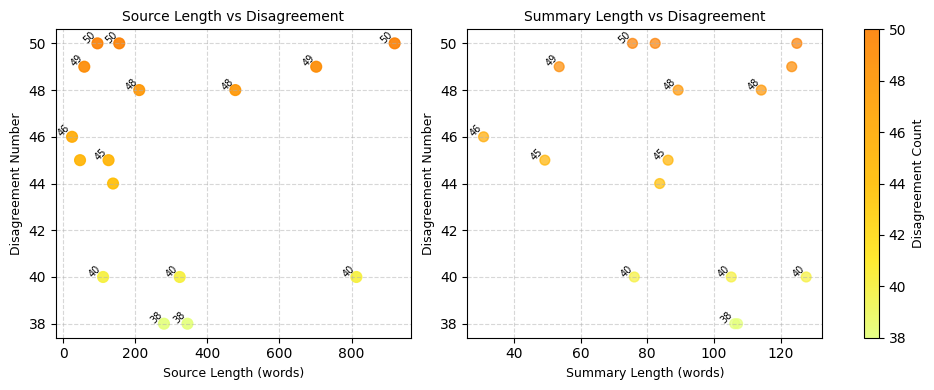

In [8]:
detector_eval.disagree_vs_length()

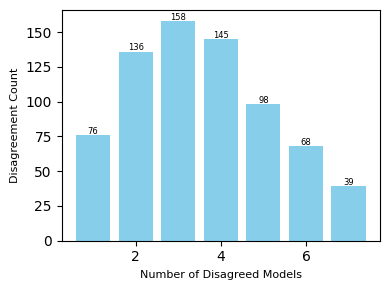

In [ ]:
detector_eval.disagree_vs_model()